# __DATA ANALYSIS ON COVID-19 IN KOREA__

--------------------------------------------------------------------------------

_Dear President Yoon Suk Yeol,_

> _I am writing to you to present the results of my analysis on the COVID-19 patient-level data of our nation and prepare our homeland for the next wave of the pandemic._

> _I am grateful for your cooperation and generosity in sharing your valuable data with us. I believe that South Korea has been one of the most successful countries in containing and managing the spread of the coronavirus, thanks to your effective policies and strategies._

> _My team and I have been working hard to extract the most critical insights from your data, using various data science techniques such as data cleaning, visualization, statistical analysis, machine learning, and predictive modeling. We have also compared your data with other countries' data to identify the best practices and lessons learned._

> _We would like to present our plan to you in more detail below with more detailed illustrations and receive your feedback and suggestions. We would appreciate it if you could arrange a meeting with us at your earliest convenience. Based on these findings, we have developed a plan of action for our country to fight the next wave of the pandemic. Our plan includes:_

> - _Increasing our testing capacity and implementing a nationwide contact tracing system using mobile devices and GPS data._
> - _Enhancing our public health education and awareness campaigns using various media platforms and channels._
> - _Developing and deploying digital solutions for health monitoring, diagnosis, treatment, and vaccination._
> - _Providing financial and social assistance for those who are affected by the pandemic, especially the marginalized and disadvantaged communities._

> _We hope that our plan will help us achieve similar or better outcomes as yours in controlling the pandemic and protecting our people. We also hope that our collaboration will strengthen our bilateral relations and foster mutual learning and exchange._

> _Thank you for your attention and support._

_Sincerely,_
<br>_Anton Pham._


In [1]:
# COVID-19 KOREA DATA ANALYSIS
# ----------------------------------------------------------------------------------------------------------------


# INITIATION ------------

# System information
import os

# Data preparation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import skimage as ski
import seaborn as sns

# Data transformation & algorithms
import numpy as np
import scipy as sp

# Data modeling
import sklearn as sk

# Miscellaneous
import math
from tabulate import tabulate
from processes import \
    preparation, \
    transformation, \
    cleaning, \
    visualization, \
    modeling

print(
    'CURRENT DIRECTORY:\n'
    '. = \"', os.getcwd(), '\"', sep=''
)

for dirName, _, filenames in os.walk('.'):
    if dirName[2:3] != '.':
        print('\n', dirName, sep='')
        for filename in filenames:
            print(os.path.join(dirName, filename))


CURRENT DIRECTORY:
. = "G:\My Drive\Codes\.Projects\DS\Turing\1 Data Wrangling with Python\S4\Project"

.
.\141.ipynb
.\.gitignore
.\Analysis_COVID19.ipynb
.\requirements.txt
.\LICENSE
.\README.md

.\data
.\data\Case.csv
.\data\PatientInfo.csv
.\data\Policy.csv
.\data\Region.csv
.\data\SearchTrend.csv
.\data\SeoulFloating.csv
.\data\Time.csv
.\data\TimeAge.csv
.\data\TimeGender.csv
.\data\TimeProvince.csv
.\data\Weather.csv
.\data\PatientRoute.csv

.\processes
.\processes\preparation.py
.\processes\transformation.py
.\processes\visualization.py
.\processes\modeling.py
.\processes\cleaning.py

.\processes\__pycache__
.\processes\__pycache__\preparation.cpython-311.pyc
.\processes\__pycache__\transformation.cpython-311.pyc
.\processes\__pycache__\cleaning.cpython-311.pyc
.\processes\__pycache__\visualization.cpython-311.pyc
.\processes\__pycache__\modeling.cpython-311.pyc

.\processes\tools
.\processes\tools\modify_cls.py

.\processes\tools\__pycache__
.\processes\tools\__pycache__\modif

## Familiarization with the Data

I will use the pandas library to load the data into a DataFrame and explore its shape, columns, and summary
statistics. This will help us identify any potential issues with the data quality, such as missing values, outliers, or incorrect formats. We will also visualize some key variables using matplotlib and seaborn to gain insights into the distribution and relationships of the data.


In [15]:
# EXECUTION -------------

# Display plots directly in the notebook interface
%matplotlib inline

# Convert dataset into dataframe
## Patient data
PatientInfo = pd.read('.\data\PatientInfo.csv')
PatientRoute = pd.read('.\data\PatientRoute.csv')
## Time series data
Time = pd.read('.\data\Time.csv')
TimeAge = pd.read('.\data\TimeAge.csv')
TimeGender = pd.read('.\data\TimeGender.csv')
TimeProvince = pd.read('.\data\TimeProvince.csv')
## Additional data
Region = pd.read('.\data\Region.csv')
Weather = pd.read('.\data\Weather.csv')
Trend = pd.read('.\data\SearchTrend.csv')
Seoul = pd.read('.\data\SeoulFloating.csv')
Policy = pd.read('.\data\Policy.csv')

# Format indices & rearrange the rows
# DATA.reorder_rows()

# Format columns' titles
# DATA.format_titles()
# DATA.update_cols()

# First 10 observations
# DATA.head(10)


In [18]:
## Case data
Case = pd.read('.\data\Case.csv')

Case['case_id'] = Case['case_id'].astype(str)
Case['code'] = Case['case_id'].str[:5]
Case['case_no'] = Case['case_id'].str[5:]

Case = Case.reindex(columns=['case_id', 'code', 'case_no', 'province', 'city', 'group',
                             'infection_case', 'confirmed', 'latitude', 'longitude'])

Case.head(10)

,case_id,code,case_no,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,10000,01,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,10000,02,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,10000,03,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,10000,04,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,10000,05,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
5,1000006,10000,06,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
6,1000007,10000,07,Seoul,from other city,True,SMR Newly Planted Churches Group,36,-,-
7,1000008,10000,08,Seoul,Dongdaemun-gu,True,Dongan Church,17,37.592888,127.056766
8,1000009,10000,09,Seoul,from other city,True,Coupang Logistics Center,25,-,-
9,1000010,10000,10,Seoul,Gwanak-gu,True,Wangsung Church,30,37.481735,126.930121


### Improving Readability
One of the steps in data analysis is to improve the readability and format of the dataset.

For the numerical data, I will assign the 'date & time' columns with `datetime` data type for further effective data
manipulation.
Furthermore, for the categorical data, I will standardize several of these columns when they can be
considered to be (at least) ordinal variables.

By improving the readability and format of the dataset, we can enhance the quality and clarity of the data analysis. We can also save time and space when performing operations on the data.


In [86]:
# Improve Dataset's Readability & Reformat Numerical & Categorical Data

print('# Categorical data are simplified and reformatted')
print('# Numerical values for appropriate levels are assigned.')


# Categorical data are simplified and reformatted
# Numerical values for appropriate levels are assigned.


In [20]:
Case.update_cols()
Case.recap()

Number of Observations: 174; 
Number of Features: 10.
- Categorical features: case_id, code, case_no, province, city, infection_case, latitude, longitude; 
- Numerical features: confirmed.


,case_id,code,case_no,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,10000,01,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,10000,02,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,10000,03,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,10000,04,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,10000,05,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374
5,1000006,10000,06,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
6,1000007,10000,07,Seoul,from other city,True,SMR Newly Planted Churches Group,36,-,-
7,1000008,10000,08,Seoul,Dongdaemun-gu,True,Dongan Church,17,37.592888,127.056766
8,1000009,10000,09,Seoul,from other city,True,Coupang Logistics Center,25,-,-
9,1000010,10000,10,Seoul,Gwanak-gu,True,Wangsung Church,30,37.481735,126.930121


## Data Cleaning
Before analyzing the Coursera dataset, some data cleaning steps will be performed to ensure the quality and validity of the data. In this section, we will describe the data cleaning process that we applied to the data.



First, any observations with erroneous values that are in unsuitable formats or missing values will be handled.

In [156]:
# HANDLING ERRONEOUS VALUES

# Cleaning the dataset
if Case.has_nan() or Case.has_na():
    ## Observations with erroneous non-numeric data such as Title, Organization, Certificate Type, and Difficulty are
    # removed;
    Case.dropna(subset=''.split(', '), inplace=True)
    ## Due to limited number of observations, invalid numeric data are replaced with the variables' medians
    Case.fillna(DATA.median(numeric_only=True, skipna=True), inplace=True)

print('\n# Dataset no longer contains unrepresentable or missing data.')


Invalid values not found.
Missing values not found.

# Dataset no longer contains unrepresentable or missing data.


Second, any duplicate samples and features based on IDs and names will be investigated further from the dataset to understand the reasons behind these duplicates and to avoid redundancy and bias.

In [157]:
# REMOVING DUPLICATE SAMPLES & FEATURES

# Remove duplicated IDs
Case.has_duplicates('index', rm=True)


Duplicated IDs not found.


False

In [78]:
# Investigate duplicated titles



# print('\n# Dataset no longer contains duplicated observations.')


Third, any outliers in the numeric variables will be treated by observing boxplots and calculating the interquartile
range (IQR) for each variable. Any values that are more than 1.5 times the IQR above or below the first or third
quartile will be considered potential outliers which will require further careful treatment.

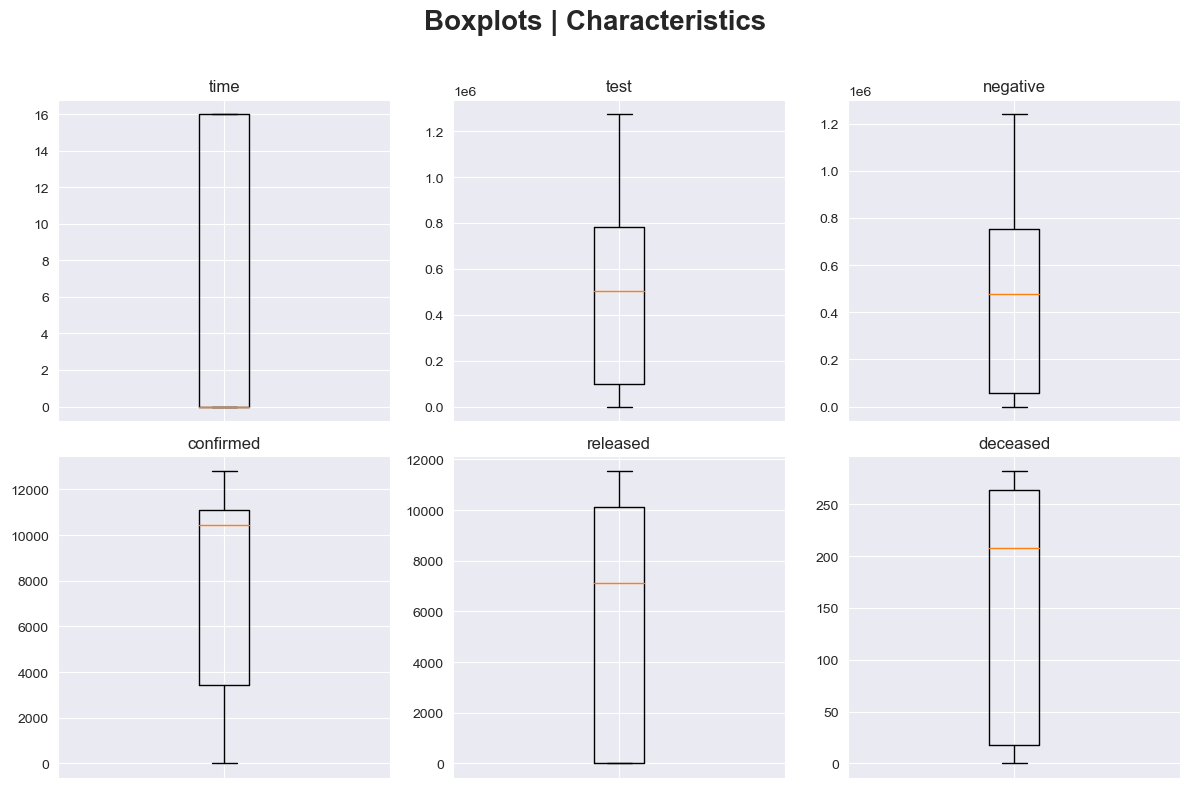

In [158]:
# TREATING OUTLIERS

# Boxplots of quantitative data
Time.boxplots()


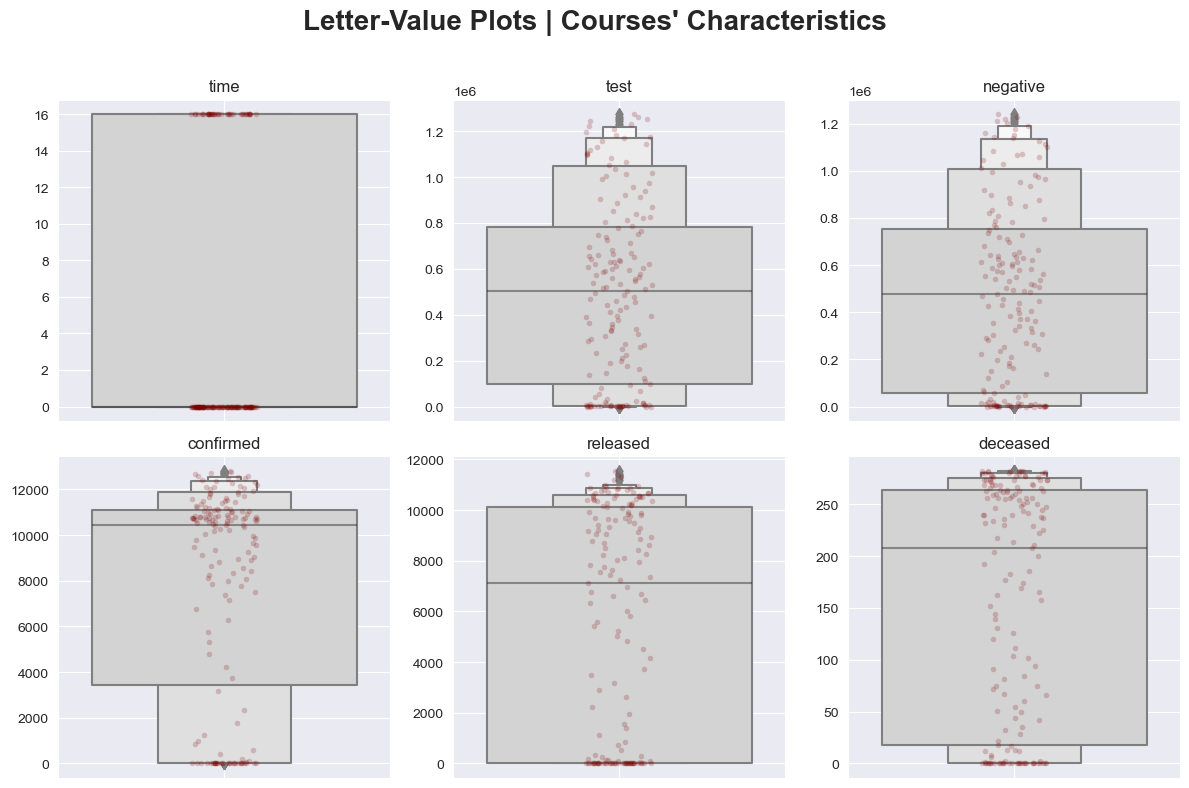

In [159]:
# Letter-value plots of quantitative data
Time.boxenplots(color='lightgray', color_points='maroon')


## Exploratory Data Analysis



### Correlations
One of the data science techniques that we used in this project is correlation analysis. Correlation analysis is a statistical technique that measures the strength and direction of the relationship between two variables. For example, we can use correlation analysis to see if there is a positive or negative association between the number of confirmed COVID-19 cases and the number of tests performed in South Korea. Correlation analysis can help us identify which variables are influencing the outcome metric, which is the number of deaths due to COVID-19 in this case.

We perform correlation analysis for all the datasets below, which contain various information about the COVID-19 situation in South Korea. We use Pearson's correlation coefficients and also visualize the correlation results using scatter plots, heat maps, and correlation matrices.


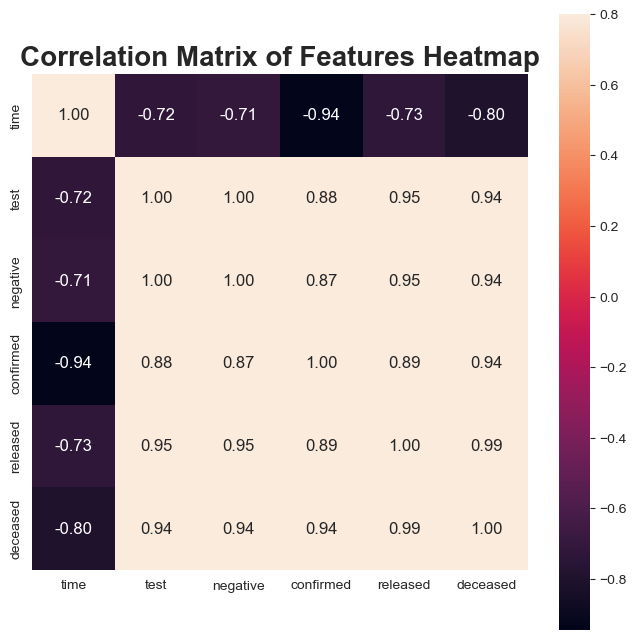

In [166]:
# Heatmap that represents the correlation matrix of the numeric data
Time.corr_heatmap()


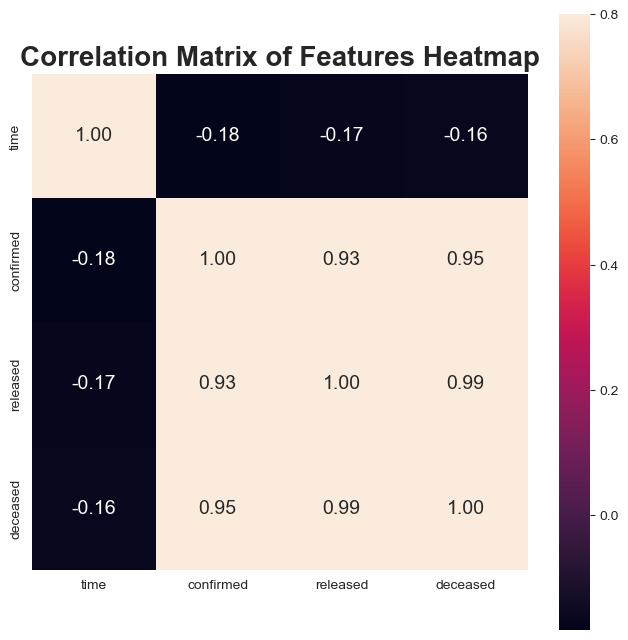

In [167]:
TimeProvince.corr_heatmap()

## Overview

<Figure size 1200x600 with 0 Axes>

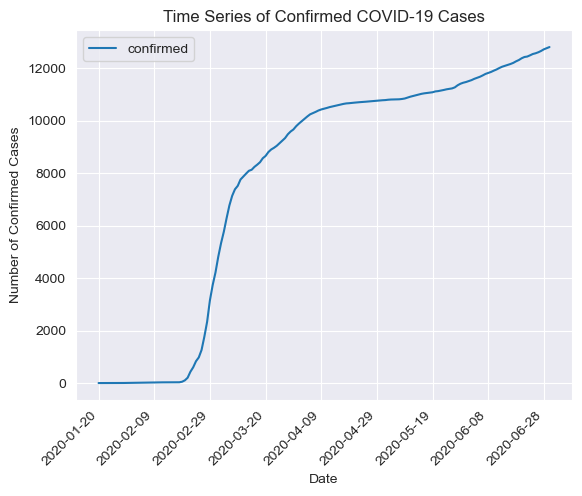

In [152]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the time series data
Time.plot('date', 'confirmed')

# Set the plot title and labels
plt.title('Time Series of Confirmed COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')

# Customize the x-axis ticks
plt.xticks(rotation=45, ha='right')

# Show the gridlines
plt.grid(True)

# Display the plot
plt.show()

## 1. How does the number of confirmed cases relate to different age groups?
Understanding the relationship between age groups and the number of confirmed cases can help in developing targeted strategies for different age demographics, such as prioritizing vaccination efforts. This can assist in protecting the most vulnerable age groups and reducing overall transmission rates.


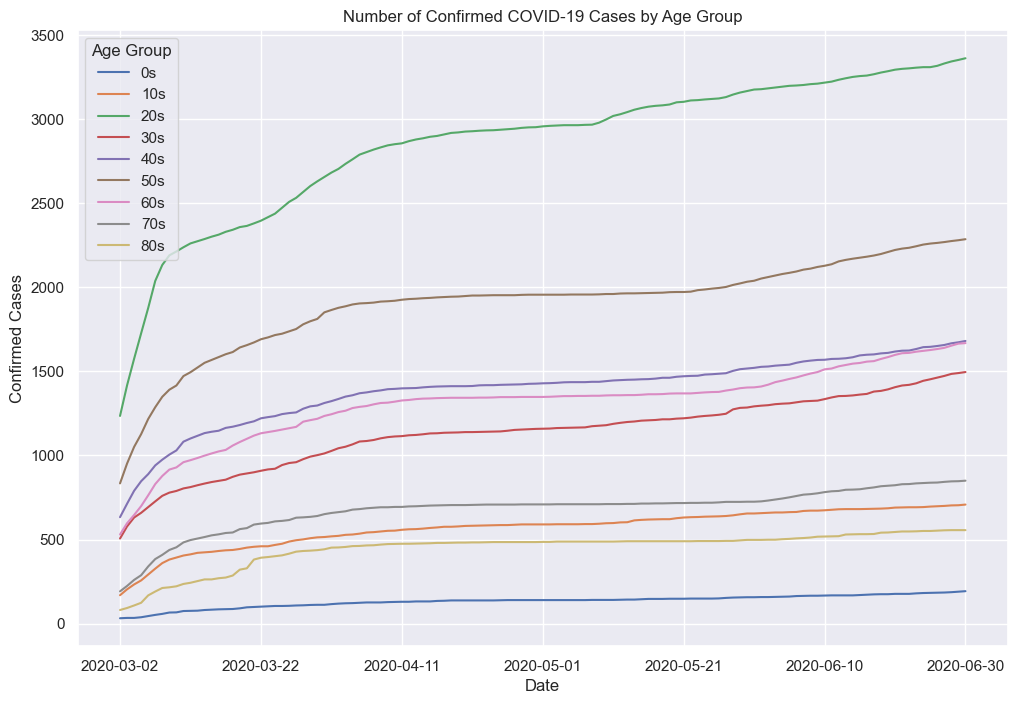

In [96]:
# Load the data
TimeAge = pd.read('./data/TimeAge.csv')

# Filter the relevant columns from TimeAge data
time_age_filtered = TimeAge[['date', 'age', 'confirmed']]

# Group the data by age and calculate the total confirmed cases for each age group on each date
grouped_data = time_age_filtered.groupby(['age', 'date']).sum().reset_index()

# Pivot the data to have age groups as columns and dates as rows
pivot_data = grouped_data.pivot(index='date', columns='age', values='confirmed')

# Plotting the data
pivot_data.plot(kind='line', figsize=(12, 8))
plt.title('Number of Confirmed COVID-19 Cases by Age Group')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend(title='Age Group')
plt.show()


## 2. Are there any gender-based differences in the COVID-19 infection rate and recovery rate?
Analyzing gender-based differences in infection and recovery rates can provide insights into the susceptibility and immune response variations between genders. It can help in designing tailored prevention and treatment approaches, taking into account the specific needs and risks associated with each gender.


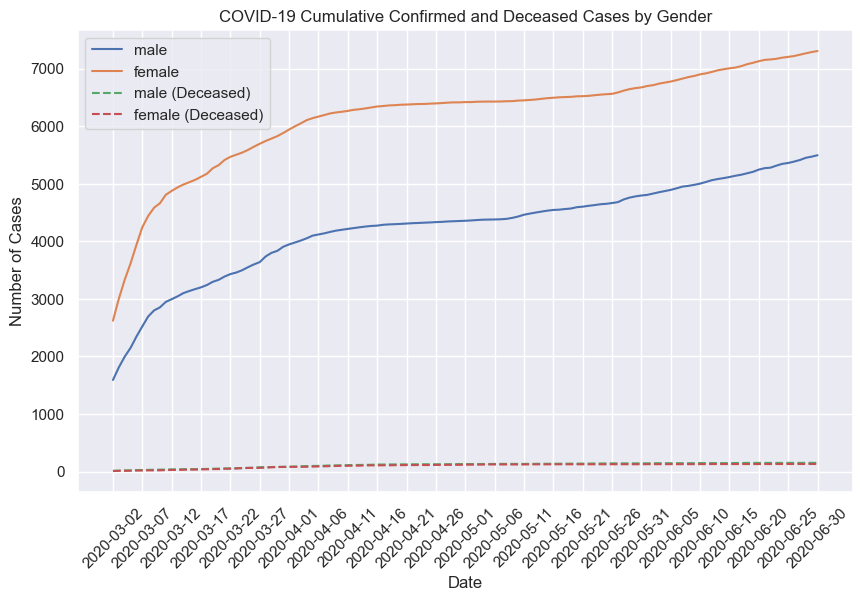

In [97]:
# Load the data
TimeGender = pd.read('./data/TimeGender.csv')

# Group the data by gender and calculate the cumulative sum
confirmed_by_gender = TimeGender.groupby('sex')['confirmed']
deceased_by_gender = TimeGender.groupby('sex')['deceased']

# Get unique genders
genders = TimeGender['sex'].unique()

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the confirmed cases for each gender
for gender in genders:
    plt.plot(TimeGender[TimeGender['sex'] == gender]['date'], confirmed_by_gender.get_group(gender), label=gender)

# Plot the deceased cases for each gender
for gender in genders:
    plt.plot(TimeGender[TimeGender['sex'] == gender]['date'], deceased_by_gender.get_group(gender), linestyle='--', label=f'{gender} (Deceased)')

# Set the plot title and labels
plt.title('COVID-19 Cumulative Confirmed and Deceased Cases by Gender')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Get the current x-tick locations
xticks = plt.xticks()[0]

# Determine the desired number of x-ticks
desired_num_ticks = 24  # Adjust this value as per your requirement

# Calculate the step size for x-tick placement
step_size = int(len(xticks)/(desired_num_ticks - 1))

# Set the new x-tick locations
new_xticks = xticks[::step_size]
plt.xticks(new_xticks)

# Display the plot
plt.show()

## 3. What is the relationship between COVID-19 cases and geographical regions?
Identifying regional variations in COVID-19 cases can guide localized interventions and resource allocation to the areas with higher transmission rates. This allows for targeted public health measures, including testing, contact tracing, and healthcare provision, to effectively control the spread of the virus in specific regions.


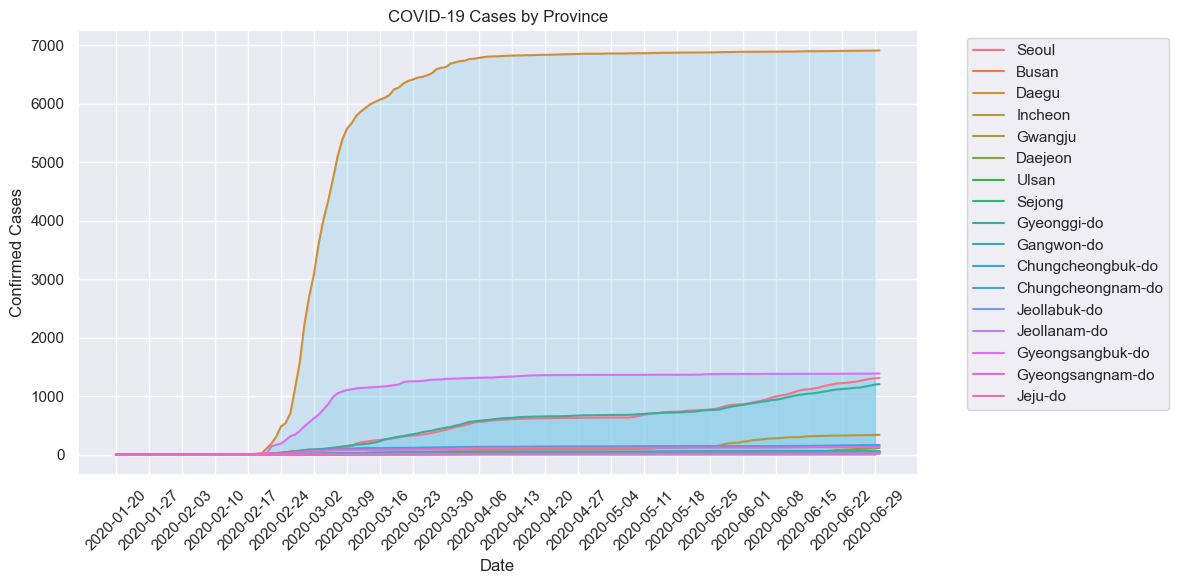

In [98]:
# Load the TimeProvince data
TimeProvince = pd.read_csv('./data/TimeProvince.csv')

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=TimeProvince, x='date', y='confirmed', hue='province')

# Fill the area below the line with color
for province in merged_data['province'].unique():
    province_data = merged_data[merged_data['province'] == province]
    plt.fill_between(province_data['date'], province_data['confirmed'], color='skyblue', alpha=0.3)

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('COVID-19 Cases by Province')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Get the current x-tick locations
xticks = plt.xticks()[0]

# Determine the desired number of x-ticks
desired_num_ticks = 24  # Adjust this value as per your requirement

# Calculate the step size for x-tick placement
step_size = int(len(xticks)/(desired_num_ticks - 1))

# Set the new x-tick locations
new_xticks = xticks[::step_size]
plt.xticks(new_xticks)

# Display the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 4. How does the weather impact the spread and severity of COVID-19 cases?
Investigating the impact of weather on COVID-19 cases can aid in understanding environmental factors that contribute to the spread of the virus and guide public health measures. It can inform the development of weather-based predictive models and help authorities anticipate and respond to potential surges in cases during specific weather conditions.


In [68]:
TimeProvinceWeather = pd.merge(TimeProvince, Weather, how='left', on=['date', 'province'])
TimeProvinceWeather.head(1)

,date,time,province,confirmed,released,deceased,code,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,2020-01-20,16,Seoul,0,0,0,10000.0,0.7,-3.3,5.5,0.0,5.7,270.0,46.8


In [70]:
TimeProvinceWeather['date'] = pd.to_datetime(TimeProvinceWeather['date'], format='%Y-%m-%d')

### Entire South Korea

In [149]:
def plot_3d(d, title=''):
    # Create figure and axes
    fig = plt.figure(dpi=100, figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot of the variables
    ax.scatter3D(d['date'].values.astype(float), d['avg_temp'],
                 d['confirmed'])

    # Add error bars
    ax.errorbar(d['date'].values.astype(float), d['avg_temp'], d['confirmed'],
                yerr=d['min_temp'], zerr=d['max_temp'],
                fmt='none', ecolor='red')

    # Set plot's background color
    ax.set_facecolor('none')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

    # Set plot's labels and title
    ax.set_xlabel('Time')
    ax.set_ylabel('Average temperature')
    ax.set_zlabel('Confirmed cases')
    ax.set_title(title, fontsize=20, fontweight='bold')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Setting custom x-axis tick positions and labels
    ax.set_xticks([])

    # Show the plot
    plt.show()


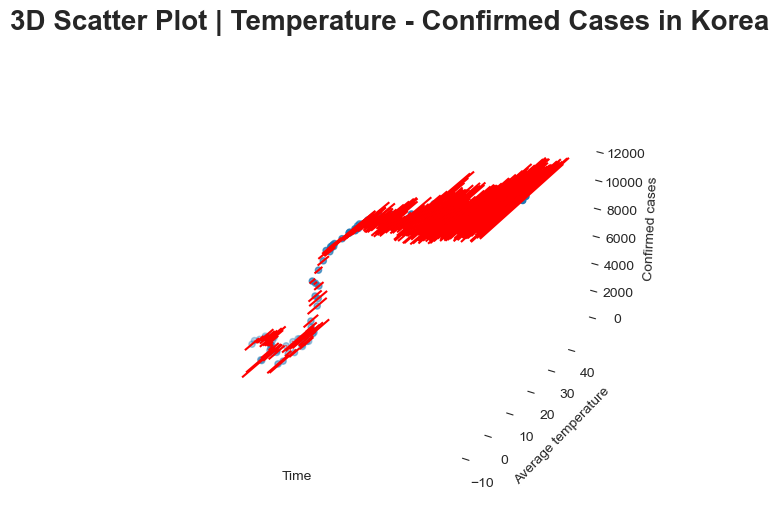

In [150]:
d = TimeProvinceWeather.groupby('date').agg({'confirmed': 'sum', 'avg_temp': 'mean',
                                             'min_temp': 'mean', 'max_temp': 'mean'})
d.reset_index(inplace=True)

plot_3d(d, title='3D Scatter Plot | Temperature - Confirmed Cases in Korea')


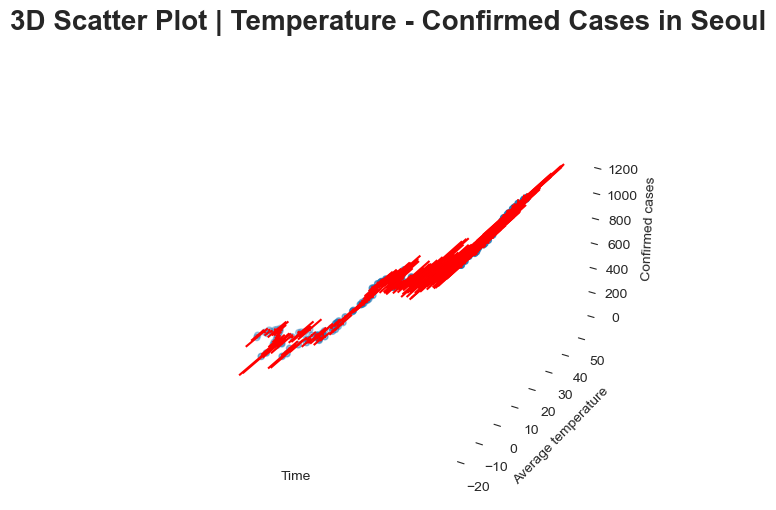

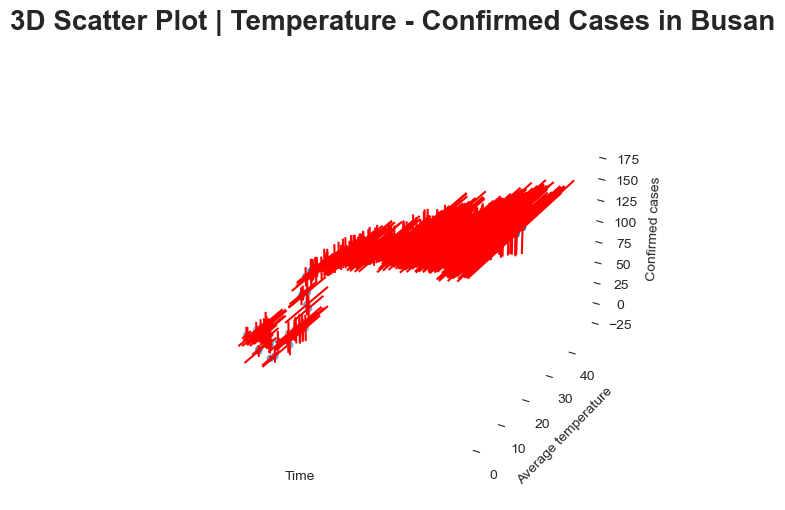

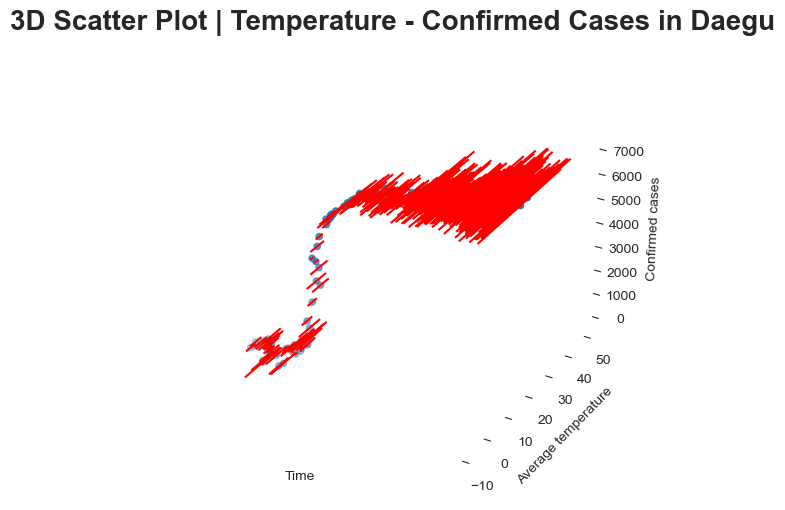

In [151]:
provinces = TimeProvinceWeather['province'].unique()

for p in provinces[:3]:
    d = TimeProvinceWeather[TimeProvinceWeather['province'] == p]
    plot_3d(d, title=f'3D Scatter Plot | Temperature - Confirmed Cases in {p}')

## Suggestions for Future Pandemic Prevention
Based on the analysis of the COVID-19 data in South Korea, several key insights and findings have emerged that can contribute to future pandemic prevention efforts. These suggestions are aimed at policymakers and healthcare professionals to enhance their preparedness and response strategies. The following recommendations are derived from the project's findings:

- Prioritize the care and protection of adults, considering their activity levels and potential vulnerability to infection.
- Pay special attention to the protection of females in Korea, as they may have specific risk factors or healthcare needs during a pandemic.
- Strengthen protective measures in highly-populated regions with high economic activities, as these areas may experience increased transmission risks due to population density and frequent interactions.
- Recognize the positive relationship between temperature and the severity and spread of COVID-19, and consider the impact of weather conditions in designing prevention strategies and resource allocation.
- Foster international collaboration and information sharing to improve global pandemic preparedness, response coordination, and the exchange of best practices.

It is important to note that these recommendations should be adapted and tailored to the specific context and circumstances of each country. Continuous monitoring, evaluation, and adaptation of strategies based on evolving scientific evidence and local conditions are essential for effective pandemic prevention and control.

By implementing these suggestions and incorporating the findings of this data science project, we can further strengthen our preparedness and response capabilities, mitigate the impact of future pandemics, and safeguard the health and well-being of populations worldwide.

